In [55]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.test.is_gpu_available()

## Training One Sample

In [77]:
# Load Data
data = np.genfromtxt('./data.csv', delimiter=',')

X = data[:, :-1]
y = data[:, -1:]

# theta
W = tf.Variable(-0.34)
b = tf.Variable(0.04)

# forward
def predict(X, W, b):
  return X*W+b

In [78]:
# some params
lr = 0.01
epochs = 20
losses = []

for epoch in range(epochs):
  for x_train, y_train in zip(X, y):
    with tf.GradientTape(persistent=True) as tape:
      # predict
      y_hat = predict(x_train, W, b)

      # Loss Function
      loss = tf.square(y_hat - y_train)
    
    # debug
    losses.append(loss)

    # Gradient
    dW, db = tape.gradient(loss, [W, b])

    # Update weights
    W.assign_sub(lr*dW)
    b.assign_sub(lr*db)

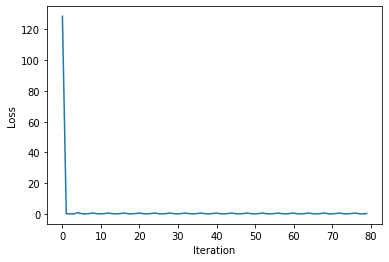

In [79]:
# Visualize 

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Training N Samples

In [70]:
# Load Data
data = np.genfromtxt('./data.csv', delimiter=',')

X = data[:, :-1]
y = data[:, -1:]

# theta
W = tf.Variable(-0.34)
b = tf.Variable(0.04)

# forward
def predict(X, W, b):
  return X*W+b

In [71]:
# some params
lr = 0.01
epochs = 100
losses = []

for epoch in range(epochs):
  x_train, y_train = X, y
  with tf.GradientTape(persistent=True) as tape:
    # predict
    y_hat = predict(x_train, W, b)

    # Loss Function
    loss = tf.reduce_mean(tf.square(y_hat - y_train))
  
  # debug
  losses.append(loss)

  # Gradient
  dW, db = tape.gradient(loss, [W, b])

  # Update weights
  W.assign_sub(lr*dW)
  b.assign_sub(lr*db)

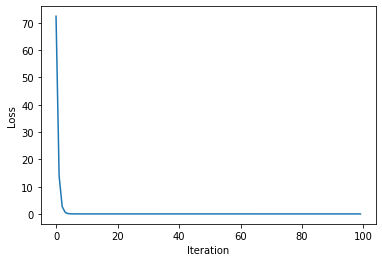

In [72]:
# Visualize 

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()